In [1]:
%pylab inline



# Astropy
import astropy.coordinates as coord
import astropy.units as u
from astropy.constants import G


# Gala
import gala.dynamics as gd
import gala.integrate as gi
import gala.potential as gp
from gala.units import galactic

Populating the interactive namespace from numpy and matplotlib


In [2]:
orbits_mo5_1 = np.genfromtxt("./orbits_nbody_LMC5_15M_vir_eps_100pc_ics2_grav_M05_particle_000.txt")
orbits_mo5_2 = np.genfromtxt("./orbits_nbody_LMC5_15M_vir_eps_100pc_ics2_grav_M05_particle_001.txt")


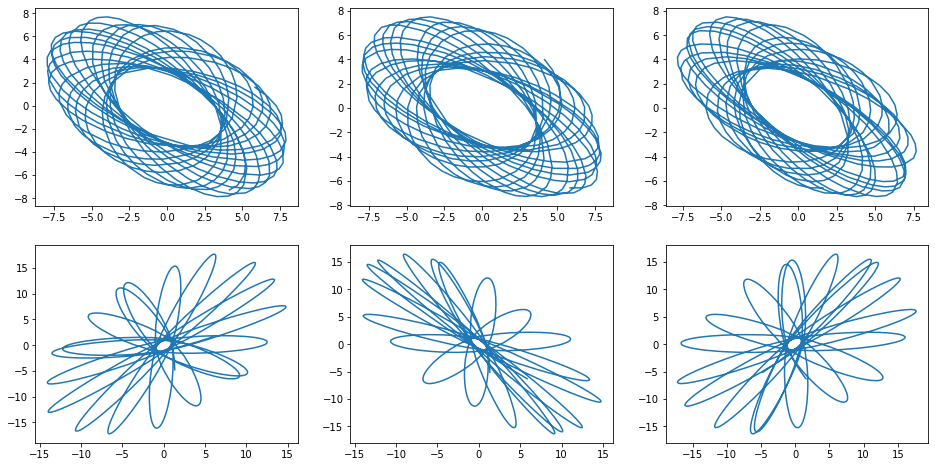

In [3]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
ax[0][0].plot(orbits_mo5_1[:,0], orbits_mo5_1[:,1])
ax[0][1].plot(orbits_mo5_1[:,0], orbits_mo5_1[:,2])
ax[0][2].plot(orbits_mo5_1[:,1], orbits_mo5_1[:,2])

ax[1][0].plot(orbits_mo5_2[:,0], orbits_mo5_2[:,1])
ax[1][1].plot(orbits_mo5_2[:,0], orbits_mo5_2[:,2])
ax[1][2].plot(orbits_mo5_2[:,1], orbits_mo5_2[:,2])

In [22]:
# Present-day position/velocity in inertial frame moving with instantaneous 
# Milky Way velocity:
w0_p1 = gd.PhaseSpacePosition(
    pos= [orbits_mo5_1[0,0], orbits_mo5_1[0,1], orbits_mo5_1[0,2]]*u.kpc,
    vel=[orbits_mo5_1[0,3], orbits_mo5_1[0,4], orbits_mo5_1[0,5]]*u.km/u.s,
)

w0_p2 = gd.PhaseSpacePosition(
    pos= [orbits_mo5_2[0,0], orbits_mo5_2[0,1], orbits_mo5_2[0,2]]*u.kpc,
    vel=[orbits_mo5_2[0,3], orbits_mo5_2[0,4], orbits_mo5_2[0,5]]*u.km/u.s,
)

pot_mw = gp.HernquistPotential(m=1.799e11*u.Msun, c=20*u.kpc, units=galactic)


In [31]:
orbits_p1 = pot_mw.integrate_orbit(w0_p1, dt=0.01*u.Gyr, t1=0*u.Gyr, t2=10*u.Gyr)
orbits_p2 = pot_mw.integrate_orbit(w0_p2, dt=0.01*u.Gyr, t1=0*u.Gyr, t2=10*u.Gyr)


hola integrator
hola integrator


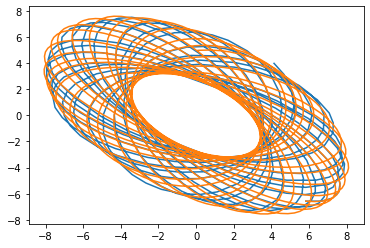

In [41]:
plot(orbits_mo5_1[:,0], orbits_mo5_1[:,2])
plot(orbits_p1.xyz[0], orbits_p1.xyz[2])


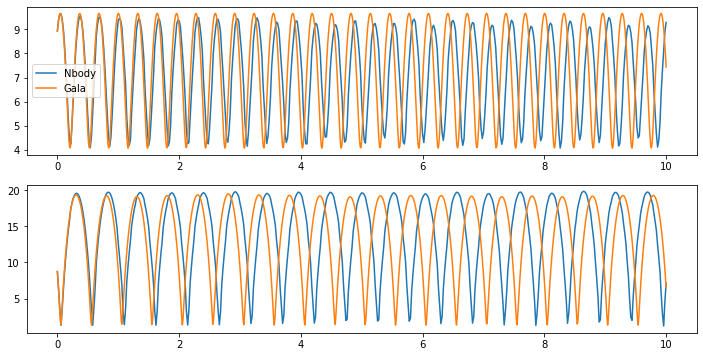

In [48]:
time1 = np.linspace(0, 10, 501)
time2 = np.linspace(0, 10, 1000)

fig, ax = plt.subplots(2, 1, figsize=(12, 6))

ax[0].plot(time1, np.sqrt(np.sum(orbits_mo5_1[:,0:3]**2, axis=1)), label='Nbody')
ax[0].plot(time2, np.sqrt(np.sum(orbits_p1.xyz.value**2, axis=0)), label='Gala')
ax[0].legend()

ax[1].plot(time1, np.sqrt(np.sum(orbits_mo5_2[:,0:3]**2, axis=1)))
ax[1].plot(time2, np.sqrt(np.sum(orbits_p2.xyz.value**2, axis=0)))

In [49]:
# Halo COM

halo_com = np.loadtxt('./LMC5_15M_vir_eps_100pc_com.txt')

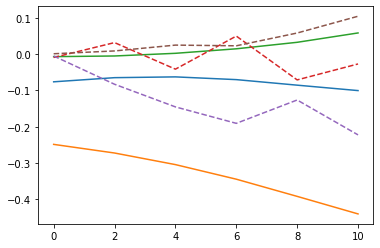

In [60]:
plot(np.linspace(0, 10, 6), halo_com[:,0])
plot(np.linspace(0, 10, 6), halo_com[:,1])
plot(np.linspace(0, 10, 6), halo_com[:,2])

plot(np.linspace(0, 10, 6), halo_com[:,6], ls='--')
plot(np.linspace(0, 10, 6), halo_com[:,7], ls='--')
plot(np.linspace(0, 10, 6), halo_com[:,8], ls='--')

In [7]:
import sys
sys.path.append('../../../codes/nba/src/')
from read_snap import load_snapshot
from structure import Structure

In [8]:
data = load_snapshot('./data/LMC5_15M_vir_eps_100pc_ics2_000.hdf5', snapformat=3)

Loading 'Coordinates' of particles types 'PartType1' from snapshot: './data/LMC5_15M_vir_eps_100pc_ics2_000.hdf5'
<KeysViewHDF5 ['Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'Velocities']>
Loading 'Velocities' of particles types 'PartType1' from snapshot: './data/LMC5_15M_vir_eps_100pc_ics2_000.hdf5'
<KeysViewHDF5 ['Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'Velocities']>
Loading 'Masses' of particles types 'PartType1' from snapshot: './data/LMC5_15M_vir_eps_100pc_ics2_000.hdf5'
<KeysViewHDF5 ['Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'Velocities']>
Loading 'ParticleIDs' of particles types 'PartType1' from snapshot: './data/LMC5_15M_vir_eps_100pc_ics2_000.hdf5'
<KeysViewHDF5 ['Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'Velocities']>


In [9]:
mtot = np.sum(data[2])
print(mtot)

17.995384


In [10]:
halo_s = Structure(data[0], data[2]*1E10)

In [12]:
rr = np.linspace(0, 150, 99)

In [18]:
rho = halo_s.density_profile(100, 0, 150)
gala_rho = pot_mw.density([rr, np.zeros_like(rr), np.zeros_like(rr)])

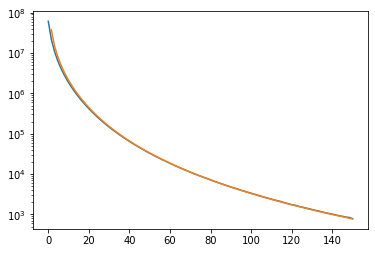

In [19]:
rr = np.linspace(0, 150, 99)

plot(rr, rho)
plot(rr, gala_rho)

yscale('log')